In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def norm_data(data):
    
    # ensure multinomial coeffs for each year sum to 1
    norm = np.sum(data, axis=0)
    
    print('sum ok.')
    
    return data / norm

def likelihood(years, words, data):
    
    # get probability that all of words were picked given data at year, for each year
    
    print('norm ok.')
    
    # axes of data are (word, year). loop over years (to sacrifice speed for memory)
    multinom = np.zeros_like(data[0])
    
    print('zeros ok.')
    
    for i in range(data[0].size):
    
        multinom[i] = np.prod(np.power(data[:,i], words))
        print(i)
        print(np.where((data[:,i] == 0) * (words > 0)))
    
    print('multinom ok.')
    
    # get normalization factor
    norm = np.sum(multinom*dx)
    print(norm)
    
    print('overall norm ok.')
    
    return multinom / norm
    
def prior(years):
    
    # an arbitrary exponential prior
    # to capture greater number of publications in recent years
    
    return np.exp(0.01*years) / (np.sum(np.exp(0.01*years))*dx)

def posterior(years, words, data):
    
    post = likelihood(years, words, data) * prior(years)
    
    norm = np.sum(post*dx)
    
    return post / norm

In [3]:
# get ngram word usage history data
# takes about a couple minutes with quad CPUs
filename = '../ngram_data/full_counts_1800.csv'

data = pd.read_csv(filename, delimiter=',', dtype=np.int32, header=None).values
data.shape

(3194820, 209)

In [4]:
# read words in book from a file (processed by another script to save mem.)
wordfile = "../ngram_data/words.csv"

with open(wordfile, 'r') as f:
    words = np.genfromtxt(wordfile)
    
words.shape

(3194820,)

In [7]:
# generate posterior
dx = 1
years = np.arange(1800, 2008+1, dx)

post = posterior(years, words, norm_data(data))

sum ok.
norm ok.
zeros ok.
0
(array([  43553,   45451,   55778,   81623,  111401,  140882,  142946,
        145987,  180310,  200910,  206147,  209972,  210142,  217759,
        219542,  229901,  236552,  239978,  249770,  252889,  254801,
        259003,  259534,  271725,  274103,  281156,  290782,  299055,
        311026,  311032,  312969,  318190,  380095,  386126,  397440,
        408035,  441135,  458444,  465126,  466925,  484034,  488839,
        518515,  520354,  525759,  527841,  529338,  529969,  536209,
        556870,  557650,  575444,  581964,  589273,  608057,  615931,
        616028,  619110,  625176,  633342,  637640,  638034,  638035,
        672269,  695176,  697531,  736656,  771593,  783007,  811346,
        829966,  836079,  838778,  839413,  840833,  846606,  851004,
        851433,  858315,  866463,  877222,  877443,  884305,  884526,
        888715,  897327,  903617,  907706,  913917,  916412,  928212,
        931649,  931660,  936129,  936229,  939050,  942422,

5
(array([  43553,   45451,   55778,   64553,   69719,  111401,  124294,
        140882,  142946,  145987,  180310,  200910,  202417,  206147,
        219359,  219542,  229901,  230574,  233926,  236552,  239978,
        249770,  250038,  252889,  254801,  259003,  259534,  271725,
        274103,  290782,  296604,  299055,  301838,  311026,  311032,
        312969,  314402,  314714,  318190,  364416,  380095,  397440,
        458444,  465126,  466925,  484034,  511755,  518218,  518515,
        524377,  524388,  527841,  529338,  536209,  556870,  557410,
        557650,  563557,  564029,  575444,  578024,  587368,  589273,
        597765,  615089,  615763,  615931,  619110,  623792,  625176,
        637640,  638034,  638035,  672269,  685673,  695176,  771593,
        781271,  783007,  811346,  829208,  829966,  830345,  836079,
        839413,  846606,  851004,  853023,  858315,  866463,  875295,
        877222,  877443,  883694,  884305,  884526,  888715,  900627,
        903617,  

11
(array([  43553,   45451,   55778,  140882,  142946,  180310,  202417,
        206147,  209972,  210142,  219542,  229901,  230574,  233915,
        236552,  239978,  249770,  252889,  259003,  259534,  269223,
        271725,  299055,  311026,  311032,  313070,  314353,  314402,
        318190,  364416,  380095,  397440,  402677,  412570,  458444,
        465126,  484034,  488839,  511755,  515520,  527841,  529338,
        529969,  530881,  536209,  557410,  557650,  564029,  578024,
        581964,  589273,  597765,  615931,  616028,  619110,  632673,
        680042,  695176,  771593,  781271,  783007,  811346,  829966,
        830345,  832633,  837096,  839413,  840833,  846606,  847409,
        851004,  866463,  875295,  877443,  883694,  884305,  888715,
        903617,  911628,  913917,  931649,  936291,  952620,  956664,
        957037,  957901,  958057,  993695, 1016852, 1017520, 1047864,
       1072394, 1121664, 1129139, 1142291, 1153133, 1163595, 1164160,
       1169806, 

17
(array([  43553,   45451,   55778,   69719,  140882,  142946,  145987,
        180310,  206147,  209972,  219542,  229901,  236552,  239978,
        249770,  252889,  259003,  271725,  274103,  311026,  311032,
        312969,  314714,  364416,  380095,  397440,  458444,  465126,
        466925,  484034,  488839,  511755,  515520,  518218,  527841,
        529338,  529969,  530881,  536209,  556870,  557650,  575444,
        589273,  605796,  615931,  619110,  638035,  695176,  771593,
        781271,  783007,  811346,  836079,  839413,  840833,  851004,
        851433,  866463,  877443,  883694,  884305,  888715,  903617,
        913917,  916412,  928212,  931649,  940962,  951659,  952620,
        956664,  957901,  958057, 1016852, 1017520, 1020578, 1047864,
       1072394, 1108769, 1121664, 1129139, 1142291, 1153133, 1164281,
       1169806, 1171119, 1171416, 1233381, 1239328, 1245203, 1253630,
       1255307, 1257839, 1270328, 1271185, 1271476, 1275862, 1277818,
       1278849, 

23
(array([  45451,   55778,  140882,  142946,  145987,  180310,  206147,
        209972,  229901,  230574,  236552,  249770,  252889,  259003,
        259534,  269223,  271725,  274103,  311026,  311032,  312969,
        318190,  364416,  380095,  397440,  458444,  465126,  484034,
        488839,  511755,  515520,  527841,  529338,  536209,  564029,
        575444,  589273,  597765,  615931,  619110,  625729,  680042,
        695176,  697531,  771593,  781271,  783007,  811346,  829966,
        832633,  836079,  838778,  839413,  847409,  851004,  866463,
        875295,  877443,  884526,  913917,  916412,  928212,  931649,
        942422,  951659,  956664,  957901, 1016852, 1017520, 1020578,
       1047864, 1072394, 1108769, 1121664, 1140869, 1142291, 1153133,
       1163595, 1233381, 1239328, 1245203, 1255249, 1255307, 1260491,
       1270328, 1271185, 1271476, 1271879, 1277818, 1308412, 1400417,
       1442902, 1459215, 1479239, 1488112, 1497283, 1500480, 1501372,
       1506225, 

29
(array([  43553,   45451,   55778,  140882,  142946,  145987,  180310,
        206147,  209972,  225847,  229901,  236552,  239978,  249770,
        259003,  269223,  271725,  311026,  311032,  314353,  318190,
        364416,  380095,  397440,  458444,  465126,  484034,  488839,
        511755,  527841,  529338,  529969,  536209,  578024,  589273,
        623792,  625729,  638034,  638035,  736656,  771593,  781271,
        783007,  811346,  829966,  832633,  839413,  866463,  877443,
        884305,  884526,  903617,  913917,  916412,  931649,  951659,
        952620,  956664,  957901, 1016852, 1017520, 1020578, 1047864,
       1121664, 1129139, 1142291, 1233381, 1239328, 1245714, 1253630,
       1255249, 1260491, 1270328, 1271879, 1277818, 1278849, 1400417,
       1459215, 1479239, 1483878, 1488112, 1497283, 1509311, 1523216,
       1524628, 1551728, 1568709, 1588071, 1596313, 1596473, 1685984,
       1687450, 1690832, 1690839, 1722863, 1738216, 1786391, 1816869,
       1838834, 

35
(array([  43553,   45451,   55778,  140882,  142946,  145987,  180310,
        209972,  225847,  229901,  230574,  236552,  249770,  259003,
        271725,  274103,  311026,  311032,  318190,  380095,  397440,
        458444,  465126,  484034,  511755,  527841,  615931,  638034,
        638035,  771593,  783007,  811346,  840833,  851004,  866463,
        877443,  884305,  884526,  903617,  913917,  931649,  952620,
        957901, 1005932, 1016852, 1017520, 1020578, 1047864, 1108769,
       1121664, 1140869, 1142291, 1171119, 1233381, 1239328, 1255249,
       1270328, 1271185, 1271879, 1277818, 1400417, 1442902, 1459215,
       1479239, 1488112, 1497283, 1506225, 1524152, 1524628, 1545006,
       1551728, 1556753, 1568709, 1596313, 1596473, 1685984, 1687450,
       1690832, 1697260, 1722863, 1903661, 1910199, 1914124, 1915041,
       1999085, 2033607, 2053533, 2099948, 2109306, 2114473, 2114562,
       2135859, 2193500, 2193732, 2229254, 2430177, 2435180, 2455740,
       2507170, 

47
(array([  45451,   55778,  140882,  142946,  180310,  206147,  209972,
        229901,  236552,  239978,  259003,  271725,  274103,  311032,
        318190,  380095,  397440,  458444,  465126,  484034,  511755,
        527841,  575444,  638035,  697531,  771593,  783007,  811346,
        866463,  877443,  884305,  931649,  951659,  952620,  957037,
        957901,  958056, 1016852, 1017520, 1020578, 1108769, 1121664,
       1140869, 1142291, 1164281, 1239328, 1245203, 1255307, 1270328,
       1271185, 1277818, 1400417, 1459215, 1479239, 1488112, 1497283,
       1551728, 1556753, 1568709, 1588071, 1596313, 1687450, 1695129,
       1697260, 1722863, 1910199, 1910275, 1914124, 1915041, 1999085,
       2033607, 2053533, 2099948, 2114562, 2193732, 2430177, 2455082,
       2455740, 2463741, 2507170, 2516229, 2715933, 2765460, 2767156,
       2788105, 2805081, 2843294, 2863859, 2867625, 2942477, 2967748,
       2987140, 3159359, 3173235, 3185296, 3192546]),)
48
(array([  45451,   55778,  1

59
(array([  45451,   55778,  140882,  142946,  180310,  206147,  229901,
        230574,  236552,  259003,  274103,  311032,  380095,  397440,
        458444,  465126,  484034,  527841,  529338,  697531,  771593,
        783007,  811346,  829966,  884305,  884526,  951659,  952620,
        957901, 1016852, 1017520, 1020578, 1108769, 1121664, 1140869,
       1142291, 1239328, 1245203, 1270328, 1271879, 1400417, 1459215,
       1488112, 1551728, 1596313, 1687450, 1722863, 1914124, 1999085,
       2033607, 2053533, 2099948, 2114473, 2114562, 2193500, 2430177,
       2457855, 2507170, 2516229, 2715933, 2720970, 2765460, 2767156,
       2788105, 2805081, 2843294, 2851674, 2863859, 2942477, 2967748,
       3185296, 3192546]),)
60
(array([  55778,  140882,  142946,  180310,  229901,  230574,  259003,
        311032,  397440,  458444,  465126,  488839,  527841,  529338,
        638035,  680042,  771593,  781271,  783007,  811346,  829966,
        884305,  952620,  957901, 1016852, 1017520, 11

77
(array([  45451,   55778,  140882,  229901,  249770,  259003,  271725,
        274103,  311032,  397440,  458444,  465126,  484034,  527841,
        638035,  771593,  781271,  811346,  829966,  851004,  866463,
        884305,  931649,  952620,  957901, 1017520, 1108769, 1121664,
       1140869, 1142291, 1233381, 1270328, 1277818, 1400417, 1479239,
       1488112, 1523216, 1568709, 1596313, 1685984, 1687450, 1914124,
       2033607, 2053533, 2099948, 2114473, 2114562, 2430177, 2507170,
       2715933, 2765460, 2805081, 2825279, 2843294, 2863859, 2942477,
       2967748, 3038823, 3173235, 3185296, 3192546]),)
78
(array([  45451,   55778,  140882,  206147,  229901,  230574,  259003,
        271725,  397440,  458444,  484034,  527841,  638035,  811346,
        829966,  866463,  884305,  951659,  952620,  956664,  957901,
       1016852, 1017520, 1020578, 1121664, 1142291, 1239328, 1270328,
       1479239, 1488112, 1523216, 1551728, 1588071, 1685984, 1687450,
       1722863, 1914124, 19

107
(array([  45451,   55778,  140882,  180310,  206147,  229901,  230574,
        259003,  274103,  397440,  465126,  484034,  527841,  638035,
        811346,  884526,  931649,  952620,  957901, 1020578, 1108769,
       1121664, 1270328, 1479239, 1488112, 1551728, 1685984, 1690839,
       1915041, 2053533, 2193500, 2430177, 2507170, 2765460, 2843294,
       2967748, 3038823, 3185296, 3192546]),)
108
(array([  45451,   55778,  140882,  142946,  180310,  229901,  230574,
        259003,  271725,  465126,  484034,  527841,  529338,  811346,
        884305,  957901,  958056, 1017520, 1020578, 1121664, 1239328,
       1270328, 1488112, 1551728, 1685984, 1690839, 1915041, 2114562,
       2430177, 2507170, 2765460, 2825279, 2843294, 2967748, 3038823,
       3128131]),)
109
(array([  55778,  140882,  145987,  180310,  206147,  229901,  259003,
        274103,  318190,  397440,  484034,  527841,  638035,  680042,
        811346,  884305,  884526,  952620,  957901,  958056, 1017520,
       102

125
(array([  55778,  140882,  142946,  180310,  206147,  259003,  274103,
        527841,  638034,  638035,  771593,  811346,  866463,  877443,
        884305,  952620, 1016852, 1020578, 1121664, 1142291, 1239328,
       1270328, 1479239, 1488112, 1596313, 1685984, 1914124, 1915041,
       2053533, 2114562, 2440532, 2463741, 2516229, 2765460, 2843294,
       2967748, 3038823, 3185296, 3192546]),)
126
(array([  45451,   55778,  271725,  397440,  458444,  484034,  527841,
        771593,  811346,  884305,  913917,  951659,  952620, 1017520,
       1121664, 1239328, 1270328, 1479239, 1488112, 1685984, 1690839,
       2430177, 2440532, 2455082, 2507170, 2715933, 2765460, 2843294,
       2967748, 3038823, 3128131, 3185296, 3192546]),)
127
(array([ 140882,  180310,  206147,  271725,  318190,  397440,  458444,
        465126,  484034,  527841,  771593,  811346,  866463,  884305,
        903617,  913917,  952620, 1020578, 1108769, 1121664, 1171119,
       1239328, 1255307, 1479239, 1488112, 1

149
(array([  55778,  140882,  142946,  145987,  206147,  209972,  230574,
        239978,  259003,  274103,  397440,  484034,  527841,  529338,
        638035,  811346,  829966,  877443,  884305,  903617,  913917,
        951659,  952620,  956664,  957037,  958056, 1005932, 1020578,
       1121664, 1142291, 1239328, 1255307, 1400417, 1551728, 1596313,
       1685984, 1690832, 1690839, 1910275, 1914124, 2053533, 2114562,
       2154093, 2193500, 2430177, 2440532, 2507170, 2765460, 2788105,
       2843294, 2863859, 2967748, 3038823, 3159359, 3173235, 3185296,
       3192546]),)
150
(array([  55778,  140882,  142946,  180310,  206147,  230574,  239978,
        259003,  271725,  274103,  397440,  458444,  484034,  527841,
        529338,  638035,  811346,  866463,  877222,  884305,  884526,
        903617,  913917,  952620,  956664,  957901,  958056, 1016852,
       1017520, 1020578, 1108769, 1121664, 1140869, 1142291, 1239328,
       1270328, 1488112, 1551728, 1596313, 1690839, 1722863, 

167
(array([  55778,  140882,  142946,  180310,  206147,  209972,  230574,
        239978,  259003,  271725,  397440,  458444,  484034,  527841,
        625176,  638035,  829966,  851004,  866463,  884305,  952620,
        956664,  957901, 1016852, 1020578, 1142291, 1239328, 1255249,
       1277818, 1488112, 1506225, 1551728, 1596313, 1690832, 1910275,
       1915041, 2053533, 2114562, 2154093, 2430177, 2457855, 2507170,
       2507537, 2516229, 2765460, 2767156, 2788105, 2825279, 2843294,
       2967748, 3128131, 3133716, 3173235, 3185296, 3192546]),)
168
(array([  55778,  140882,  142946,  180310,  239978,  243671,  271725,
        397440,  484034,  527841,  625176,  638034,  638035,  771593,
        811346,  866463,  877222,  877443,  884305,  913917,  951659,
        952620,  956664,  957901,  958056, 1017520, 1020578, 1121664,
       1142291, 1239328, 1255249, 1400417, 1459215, 1479239, 1488112,
       1506225, 1685984, 1690839, 1835481, 1852435, 1910275, 1914124,
       1915041, 

185
(array([  55778,  140882,  142946,  145987,  180310,  204548,  206147,
        229901,  239978,  243671,  274103,  318190,  484034,  527841,
        557410,  638035,  811346,  866463,  877222,  884305,  903617,
        952620,  956664,  957901,  958056, 1020578, 1121664, 1140869,
       1142291, 1153133, 1239328, 1255249, 1277818, 1400417, 1479239,
       1488112, 1596313, 1852435, 1914124, 1915041, 2053533, 2109306,
       2114473, 2193500, 2430177, 2440532, 2457855, 2463741, 2507170,
       2507537, 2516229, 2715933, 2765460, 2767156, 2788105, 2825279,
       2843294, 2967748, 3173235, 3185296, 3192546]),)
186
(array([ 140882,  142946,  209972,  229901,  239978,  254801,  259003,
        271725,  274103,  397440,  484034,  527841,  529338,  638035,
        829966,  851004,  866463,  877222,  877443,  884305,  913917,
        931649,  951659,  957901,  958056, 1020578, 1108769, 1142291,
       1153133, 1239328, 1255307, 1270328, 1275862, 1277818, 1400417,
       1488112, 1506225, 

197
(array([  55778,  140882,  142946,  145987,  180310,  209972,  259003,
        271725,  274103,  299055,  380095,  412570,  484034,  527841,
        529338,  557410,  589273,  638034,  638035,  811346,  829966,
        851004,  866463,  877222,  877443,  884305,  903617,  913917,
        951659,  952620,  956664,  957901,  958056, 1020578, 1121664,
       1140869, 1142291, 1239328, 1255249, 1255307, 1275862, 1277818,
       1400417, 1479239, 1488112, 1506225, 1551728, 1596313, 1596473,
       1685984, 1690832, 1690839, 1786391, 1852435, 1910275, 1914124,
       1915041, 2053533, 2099948, 2109306, 2114562, 2193500, 2195262,
       2430177, 2440532, 2455082, 2507170, 2507537, 2516229, 2715933,
       2765460, 2825279, 2863859, 2913385, 2967748, 3147719, 3185296,
       3192546]),)
198
(array([529338, 957901]),)
199
(array([  55778,  140882,  142946,  145987,  180310,  229901,  259003,
        271725,  274103,  318190,  397440,  412570,  458444,  484034,
        488839,  527841,  5892

/home/wizard/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


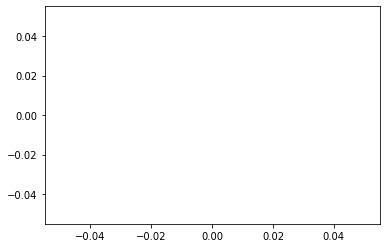

In [14]:
# make nice plots

plt.plot(years, post)
plt.show()

1